In [1]:
# Initial imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Dark2')
from collections import namedtuple
from scipy.ndimage.interpolation import shift
from mpl_toolkits import mplot3d
from matplotlib import dates as mdates
from matplotlib import cm
from scipy import stats
import os
directory = 'C:/Users/tmund/Documents/Submissions/HigherMomentsRep/'
os.chdir(directory)

In [2]:
mypath = 'DataVis/PDFs/Figs/'

In [3]:
# Import the data

m12df = pd.read_pickle('Data/Pickled/m12df.pkl')

In [8]:
# Define a function that creates x and y values of a pdf given cumulative points

def createpdf(CumulativePercentiles):
    '''
    Creates points of a non-smoothed pdf given the cumulative percentiles
    Inputs:
        Percentiles: 10 equidistant cumulative percentiles ranging from
                     5th percentile to 95th, 10 floats in a np array
                     Use, for example, m3df.iloc[[5000], 10:20].values
    Returns:
        Asset prices
        Probabilities for pdf
    '''
    BinLength = CumulativePercentiles - np.roll(CumulativePercentiles, 1, axis=1)
    MidBin = (CumulativePercentiles + np.roll(CumulativePercentiles, 1, axis=1))/2
    BinLength = BinLength[:,1:] # Remove first column
    MidBin = MidBin[:, 1:] # Remove first column
    Height = 0.1/BinLength
    
    # Reshape to column vectors
    MidBin = np.transpose(MidBin)
    Height = np.transpose(Height)
    
    return MidBin, Height

In [29]:
def ThreeDPlot(Dataframe, DateStart, DateEnd, TickGap, FileName, DateBool, subnum=1):
    '''Plots a three-dimensional chart of option implied pdfs
    Inputs:
        Dataframe: Dataframe in which data is contained
        DateStart: Starting date, in format 'yyyy-mm-dd'
        DateEnd: Ending date, in same format
        TickGap: Gap for date marks, integer
        subnum: Subplot number if doing multiple plots
    Returns:
        None
    '''
    
    # Get beginning and end rows
    StartRow = int(np.where(Dataframe.index==DateStart)[0])
    EndRow = int(np.where(Dataframe.index==DateEnd)[0])
    NoOfDays = EndRow - StartRow
    
    # Get data
    PlotData = Dataframe.iloc[StartRow:EndRow, 9:19] # Get set of cumulative percentages
    PlotData = PlotData.fillna(method='ffill', limit=None) #fill in NAs
    PlotData = PlotData.values # take values
    x, z  = createpdf(PlotData) # Get pdf values
    
    # Create y axis, dummy and real
    y1d = np.linspace(0, NoOfDays, NoOfDays) # create dummy y for axis
    y = np.tile(y1d, (9,1)) # tile the dummy axis so it is a matrix
    
    if DateBool==0:
        dates_formatted = Dataframe.index[StartRow:EndRow].to_series().dt.year
    else:
        dates_formatted = Dataframe.index[StartRow:EndRow].to_series().dt.date
        
    # Plot
    fig = plt.figure(figsize=(12, 5))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.set_facecolor('white') 
    ax.plot_surface(x, y, z,
                rstride=1,
                cstride=1,
                linewidth=0,
                cmap=cm.inferno)
    
    ax.yaxis.set_ticks(y1d[0::TickGap]) # set the ticks every TickGap days on the dummy axis
    ax.yaxis.set_ticklabels(dates_formatted[0::TickGap]) # label them with the actual days

    plt.xlabel('Implied three-month libor')
    plt.ylabel('Date')
    
    #plt.savefig(mypath+str(FileName))
    
    #plt.show()

In [41]:
def ThreeDPlot2by2(Dataframe, DateStart1, DateEnd1, TickGap1, DateBool1,
                   DateStart2, DateEnd2, TickGap2, DateBool2, FileName):
    '''Plots a three-dimensional chart of option implied pdfs
    Inputs:
        Dataframe: Dataframe in which data is contained
        DateStart: Starting date, in format 'yyyy-mm-dd'
        DateEnd: Ending date, in same format
        TickGap: Gap for date marks, integer
        subnum: Subplot number if doing multiple plots
    Returns:
        None
    '''
    
    # Get beginning and end rows 1
    StartRow1 = int(np.where(Dataframe.index==DateStart1)[0])
    EndRow1 = int(np.where(Dataframe.index==DateEnd1)[0])
    NoOfDays1 = EndRow1 - StartRow1
    
    # Get data
    PlotData1 = Dataframe.iloc[StartRow1:EndRow1, 9:19] # Get set of cumulative percentages
    PlotData1 = PlotData1.fillna(method='ffill', limit=None) #fill in NAs
    PlotData1 = PlotData1.values # take values
    x1, z1  = createpdf(PlotData1) # Get pdf values
    
    # Create y axis, dummy and real
    y1d1 = np.linspace(0, NoOfDays1, NoOfDays1) # create dummy y for axis
    y1 = np.tile(y1d1, (9,1)) # tile the dummy axis so it is a matrix
    
    if DateBool1==0:
        dates_formatted1 = Dataframe.index[StartRow1:EndRow1].to_series().dt.year
    else:
        dates_formatted1 = Dataframe.index[StartRow1:EndRow1].to_series().dt.date
        
    # Get beginning and end rows 2
    StartRow2 = int(np.where(Dataframe.index==DateStart2)[0])
    EndRow2 = int(np.where(Dataframe.index==DateEnd2)[0])
    NoOfDays2 = EndRow2 - StartRow2
    
    # Get data
    PlotData2 = Dataframe.iloc[StartRow2:EndRow2, 9:19] # Get set of cumulative percentages
    PlotData2 = PlotData2.fillna(method='ffill', limit=None) #fill in NAs
    PlotData2 = PlotData2.values # take values
    x2, z2  = createpdf(PlotData2) # Get pdf values
    
    # Create y axis, dummy and real
    y1d2 = np.linspace(0, NoOfDays2, NoOfDays2) # create dummy y for axis
    y2 = np.tile(y1d2, (9,1)) # tile the dummy axis so it is a matrix
    
    if DateBool2==0:
        dates_formatted2 = Dataframe.index[StartRow2:EndRow2].to_series().dt.year
    else:
        dates_formatted2 = Dataframe.index[StartRow2:EndRow2].to_series().dt.date
        
    # Plot 1
    fig = plt.figure(figsize=(14, 5))
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax1.set_facecolor('white') 
    ax1.plot_surface(x1, y1, z1,
                rstride=1,
                cstride=1,
                linewidth=0,
                cmap=cm.inferno)
    
    ax1.yaxis.set_ticks(y1d1[0::TickGap1]) # set the ticks every TickGap days on the dummy axis
    ax1.yaxis.set_ticklabels(dates_formatted1[0::TickGap1]) # label them with the actual days

    plt.xlabel('Implied three-month libor')
    plt.ylabel('Date')
    
    # Plot 2
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    ax2.set_facecolor('white') 
    ax2.plot_surface(x2, y2, z2,
                rstride=1,
                cstride=1,
                linewidth=0,
                cmap=cm.inferno)
    
    ax2.yaxis.set_ticks(y1d2[0::TickGap2]) # set the ticks every TickGap days on the dummy axis
    ax2.yaxis.set_ticklabels(dates_formatted2[0::TickGap2]) # label them with the actual days

    plt.xlabel('Implied three-month libor')
    plt.ylabel('Date')
    
    plt.savefig(mypath+str(FileName))
    
    plt.show()

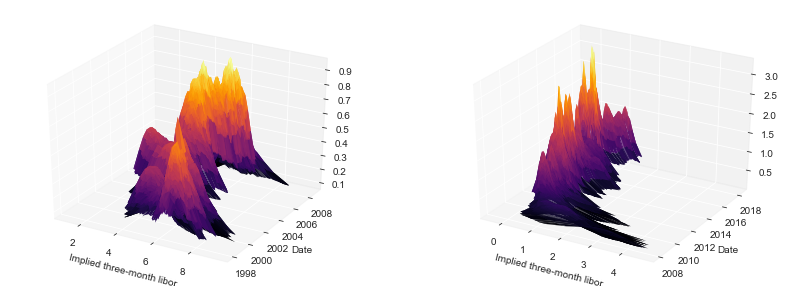

In [43]:
ThreeDPlot2by2(m12df, '1998-01-07', '2008-11-10', 525, 0, '2008-11-10', '2018-10-01', 500, 0, 'split.pdf')

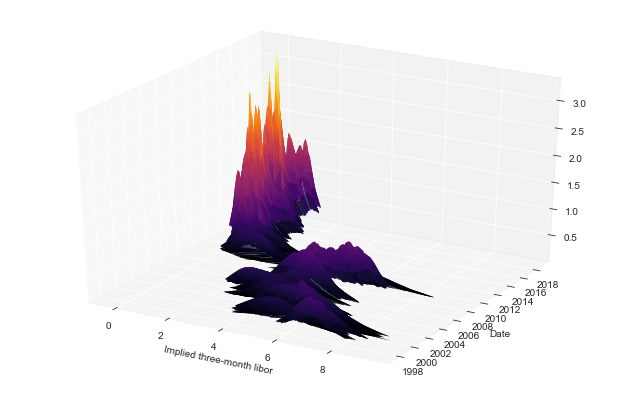

In [121]:
ThreeDPlot(m12df, '1998-01-07', '2018-10-01', 525, '3dAll.pdf', 0)